# Formulação forte
Dada uma função $f:[0,1]\rightarrow\mathbb{R}$ e constantes reais $\alpha>0$ e $\beta\geq 0$, determine $u:[0,1]\rightarrow\mathbb{R}$ tal que
\begin{align}
\left\{
\begin{aligned}
&-\alpha u_{xx}(x) + \beta u(x) = f(x),\quad x\in]0,1[,
\\
&u(0)=u(1)=0.
\end{aligned}\right.
\end{align}

Exemplos de solução exata para o problema acima:
*   Ex. 1. Se $f(x)=-2\alpha+\beta x(x-1)$, então $u(x)=x(x-1)$.
*   Ex. 2. Se $f(x)=(\alpha\pi^2+\beta)\sin(\pi x)$, então $u(x)=\sin(\pi x)$.
*   Ex. 3. Se $\alpha=1$, $\beta=0$ e $f(x)=8$, então $u(x)=-4x(x-1)$.
*   Ex. 4. Se $\alpha=\beta=1$ e $f(x)=x$, então $\displaystyle u(x)=x+(e^{-x}-e^x)/(e-e^{-1})$.

In [19]:
"Retorna os valores de α, β, f e u de acordo com o exemplo escolhido."
function exemplo1()
    α = 1.0
    β = 1.0
    f(x) = -2.0 * α + β * x *(x-1.0)
    u(x) = x * (x - 1.0)
    return α, β, f, u
end
function Exemplo2()
    α = 1.0 
    β = 1.0
    f(x) = (α*π^2 + β) *sin(π*x)
    u(x) = sin(π*x)
    return α, β, f, u
end
function Exemplo3()
    α = 1.0 
    β = 0.0
    f(x) = 8.0
    u(x) = -4.0 * x * (x - 1.0)
    return α, β, f, u
end
function Exemplo4()
    α = 1.0 
    β = 1.0
    f(x) = x
    u(x) = x + (exp(-x) - exp(x)) / (exp(1) - exp(-1))
    return α, β, f, u
end

function dados_de_entrada(exemplo)
    if exemplo == 1
        return exemplo1()
    elseif exemplo == 2
        return Exemplo2()
    elseif exemplo == 3
        return Exemplo3()
    elseif exemplo == 4
        return Exemplo4()
    else
        error("Exemplo inválido. Escolha 1, 2, 3 ou 4.")
    end
end

dados_de_entrada (generic function with 1 method)

# Problema aproximado - via o método das diferenças finitas
Considere a discretização uniforme do intervalo $[0,1]$, dada por $0 = x_0 < x_1 < \dots < x_N < x_{N+1} = 1$, onde cada subintervalo tem comprimento $h$.

Para $i \in \{1, 2, \dots, N\}$, a aproximação da segunda derivada de $u$ no ponto $x_i$ pode ser obtida usando as seguintes expansões em série de Taylor:

\begin{align*}
& u(x_i + h) = u(x_i) + h u'(x_i) + \frac{h^2}{2} u''(x_i) + \frac{h^3}{6} u'''(x_i) + \frac{h^4}{24} u^{(4)}(x_i) + \frac{h^5}{120} u^{(5)}(x_i) + O(h^6), \\
& u(x_i - h) = u(x_i) - h u'(x_i) + \frac{h^2}{2} u''(x_i) - \frac{h^3}{6} u'''(x_i) + \frac{h^4}{24} u^{(4)}(x_i) - \frac{h^5}{120} u^{(5)}(x_i) + O(h^6).
\end{align*}

Ao somar essas duas expressões, obtemos:

\begin{align*}
& u(x_i + h) + u(x_i - h) = 2 u(x_i) + h^2 u''(x_i) + \frac{h^4}{12} u^{(4)}(x_i) + O(h^6).
\end{align*}

Dessa forma, a aproximação para a segunda derivada é dada por:

\begin{align*}
& \frac{u(x_{i+1}) - 2 u(x_i) + u(x_{i-1})}{h^2} = u''(x_i) + \frac{h^2}{12} u^{(4)}(x_i) + O(h^4) \equiv u''(x_i) + O(h^2).
\end{align*}

Substituindo a aproximação acima na equação $-\alpha u_{xx}(x_i) + \beta u(x_i) = f(x_i)$, temos que 
\begin{align*}
-\alpha \frac{u(x_{i+1}) - 2 u(x_i) + u(x_{i-1})}{h^2} + \beta u(x_i) \approx f(x_i), \quad \forall i\in\{1, 2, \dots, N\}.
\end{align*}

Sob tais consideração, definimos o seguinte problema aproximado: determine $U_i\equiv U(x_i)\in\mathbb{R}$ tal que
\begin{align}
\left\{
\begin{aligned}
&-\alpha \frac{U_{i+1} - 2 U_i + U_{i-1}}{h^2} + \beta U_i = f(x_i), \quad  i\in\{1, 2, \dots, N\},
\\
&U_0=U_{N+1}=0.
\end{aligned}\right.
\end{align}

Reescrevendo este sistema na forma matricial, temos
\begin{align*}
\begin{bmatrix}
2\alpha + \beta h^2 & -\alpha & 0 & \cdots & 0 \\
-\alpha & 2\alpha + \beta h^2 & -\alpha & \cdots & 0 \\
0 & -\alpha & 2\alpha + \beta h^2 & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & -\alpha \\
0 & 0 & 0 & -\alpha & 2\alpha + \beta h^2
\end{bmatrix}
\begin{bmatrix}
U_1\\
U_2\\
U_3\\
\vdots\\
U_{N}
\end{bmatrix}=
\begin{bmatrix}
h^2f(x_1)+\alpha U_0\\
h^2f(x_2)\\
h^2f(x_3)\\
\vdots\\
h^2f(x_{N-1})\\
h^2f(x_N)+\alpha U_{N+1}
\end{bmatrix}
\end{align*}

In [2]:
"Retorna a matriz A e o vetor b de acordo com o exemplo escolhido."
function monta_A_b(α,β,f,N)
    h = 1.0 / (N+1)
    A = zeros(N, N)
    b = zeros(N)
    for i = 1:N
        A[i, i] = 2.0 * α + β * h^2
        b[i] = h^2 * f(i * h)
    end
    for i = 1:N-1
        A[i, i+1] = -α 
        A[i+1, i] = -α
    end
    return A, b
end

monta_A_b

## Comparando a solução aproximada com a solução exata

"Matriz A:"

4×4 Matrix{Float64}:
  2.04  -1.0    0.0    0.0
 -1.0    2.04  -1.0    0.0
  0.0   -1.0    2.04  -1.0
  0.0    0.0   -1.0    2.04

"Vetor b:"

4-element Vector{Float64}:
 -0.08640000000000002
 -0.08960000000000003
 -0.08960000000000003
 -0.08640000000000002

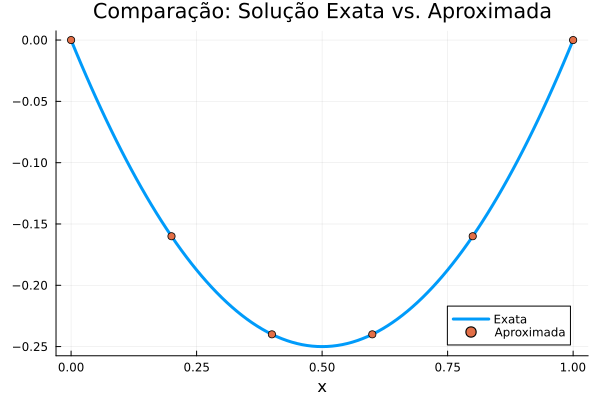

In [26]:
# Carrega o exemplo escolhido
exemplo = 1
α, β, f, u = dados_de_entrada(exemplo)

# Define o número de nós internos na malha
N = 4

# Constrói a matriz A e o vetor b com base nos parâmetros α, β e na função f
A, b = monta_A_b(α, β, f, N)

# Exibe a matriz A (sistema linear) e o vetor b (termo fonte)
display("Matriz A:")
display(A)
display("Vetor b:")
display(b)

# Resolve o sistema linear A * U = b para obter a solução aproximada U
U = A \ b

# Define a discretização da malha com N nós internos, incluindo os pontos de fronteira
malha = LinRange(0, 1, N+2)

# Gera o gráfico comparando a solução aproximada com a solução exata
using Plots
plt = plot(0:0.01:1, u.(0:0.01:1), label="Exata", lw=3, title="Comparação: Solução Exata vs. Aproximada")
plot!(plt, malha, [0; U; 0], label="Aproximada", lw=3, seriestype=:scatter) # O "!" adiciona ao gráfico existente
xlabel!("x")  # Adiciona o rótulo ao eixo x

# Exibe o gráfico final
display(plt)

## Estudo do erro

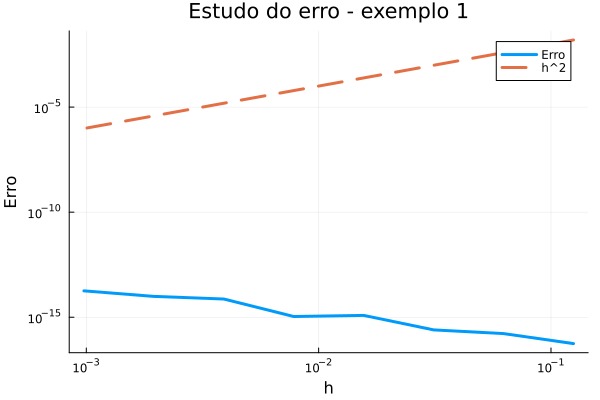

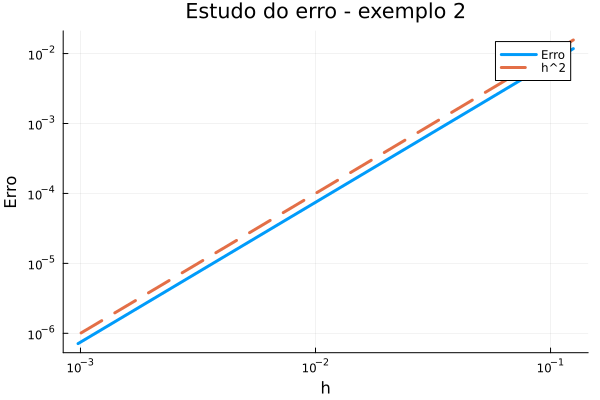

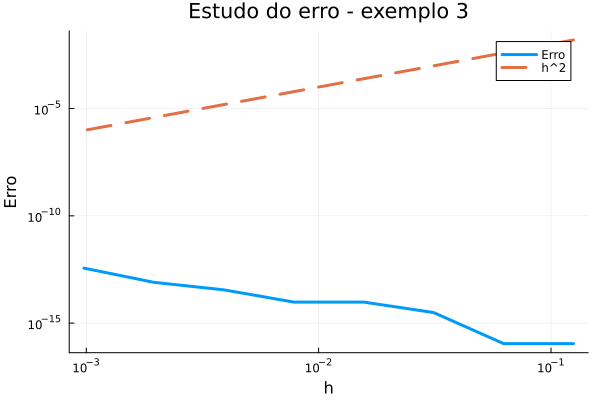

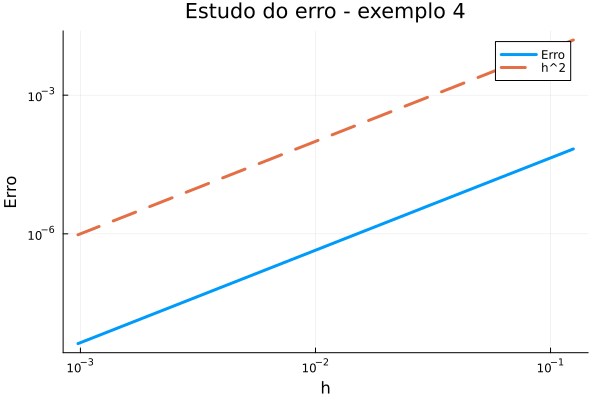

In [17]:
function estudo_do_erro(exemplo)
    # Carrega o exemplo escolhido
    α, β, f, u = dados_de_entrada(exemplo)
    # Define os valores de N a serem considerados
    vec_N = [2^i-1 for i in 3:10]
    # Inicializa o vetor para armazenar os erros
    vec_erros = zeros(length(vec_N))
    # Calcula o erro para cada valor de N
    for i = 1:length(vec_N)
        N = vec_N[i]
        h = 1.0 / (N+1)
        A, b = monta_A_b(α, β, f, N)
        U = A \ b
        vec_erros[i] = maximum(abs.(U - u.(h:h:1-h)))
    end
    # Exibe o gráfico do erro em função dos h's em escala logarítmica
    h = 1.0 ./ (vec_N .+ 1) # Calcula o tamanho do passo h para cada N
    plt = plot(h, vec_erros, lw=3, label="Erro", title="Estudo do erro - exemplo "*string(exemplo),  xscale=:log10, yscale=:log10)
    plot!(plt, h, h.^2, lw=3, ls=:dash, label="h^2") # Adiciona a curva h^2 ao gráfico
    xlabel!("h")     # Adiciona o rótulo ao eixo x 
    ylabel!("Erro")  # Adiciona o rótulo ao eixo y
    display(plt)     # Exibe o gráfico
end

estudo_do_erro(1)
estudo_do_erro(2)
estudo_do_erro(3)
estudo_do_erro(4)